In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [3]:
path = r"D:\NEU\Năm 3\DATA PREP\PROJECT_DATAPREP\GITHUB REPO\dataset\dseb63_final_project_DP_dataset\\"
POS_CASH_balance = pd.read_csv(path + 'dseb63_POS_CASH_balance.csv')

In [4]:
POS_CASH_balance.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


In [6]:
POS_CASH_balance.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


**Check duplicated and null of POS_CASH_balance**

In [10]:
POS_CASH_balance.duplicated().sum()

0

In [38]:
null_df = POS_CASH_balance.isnull().sum(axis=0)
null_df

SK_ID_PREV                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           21863
CNT_INSTALMENT_FUTURE    21878
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
SK_ID_CURR                   0
dtype: int64

In [47]:
print('-'*100)
print("Columns with NaN values and their percentages:")
percentage_null = null_df[null_df > 0] / len(POS_CASH_balance) * 100
percentage_null

----------------------------------------------------------------------------------------------------
Columns with NaN values and their percentages:


CNT_INSTALMENT           0.255906
CNT_INSTALMENT_FUTURE    0.256081
dtype: float64

### Merging TARGETS to POS_CASH_balance table

In [48]:
application_train = pd.read_csv(path + 'dseb63_application_train.csv')

In [50]:
pos_cash_merged = application_train[['SK_ID_CURR','TARGET']].merge(POS_CASH_balance,on= 'SK_ID_CURR',how='left')
print("-"*100)
print("Merging TARGET with POS_CASH_balance Table")
pos_cash_merged.head()

----------------------------------------------------------------------------------------------------
Merging TARGET with POS_CASH_balance Table


,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,278621,0,2396755.0,-66.0,12.0,1.0,Active,0.0,0.0
1,278621,0,2636178.0,-23.0,6.0,1.0,Active,0.0,0.0
2,278621,0,1810518.0,-23.0,12.0,10.0,Active,0.0,0.0
3,278621,0,1810518.0,-25.0,12.0,12.0,Active,0.0,0.0
4,278621,0,2396755.0,-67.0,12.0,2.0,Active,0.0,0.0


**Check Correlation of Numeric Feature**

In [54]:
numeric_df = pos_cash_merged._get_numeric_data()
numeric_df = numeric_df.drop(columns=['SK_ID_CURR','SK_ID_PREV'])

numeric_corr_df = numeric_df.corr()
numeric_corr_df

,TARGET,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
TARGET,1.000000,0.019416,0.017968,0.021500,0.006454,0.005827
MONTHS_BALANCE,0.019416,1.000000,0.340389,0.277796,-0.017952,-0.000661
CNT_INSTALMENT,0.017968,0.340389,1.000000,0.873802,-0.061502,-0.013605
CNT_INSTALMENT_FUTURE,0.021500,0.277796,0.873802,1.000000,-0.082936,-0.016314
SK_DPD,0.006454,-0.017952,-0.061502,-0.082936,1.000000,0.226649
SK_DPD_DEF,0.005827,-0.000661,-0.013605,-0.016314,0.226649,1.000000


C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_15804\1614146691.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(numeric_corr_df, dtype=np.bool)


Text(0.5, 1.0, 'Correlation of Numeric Features')

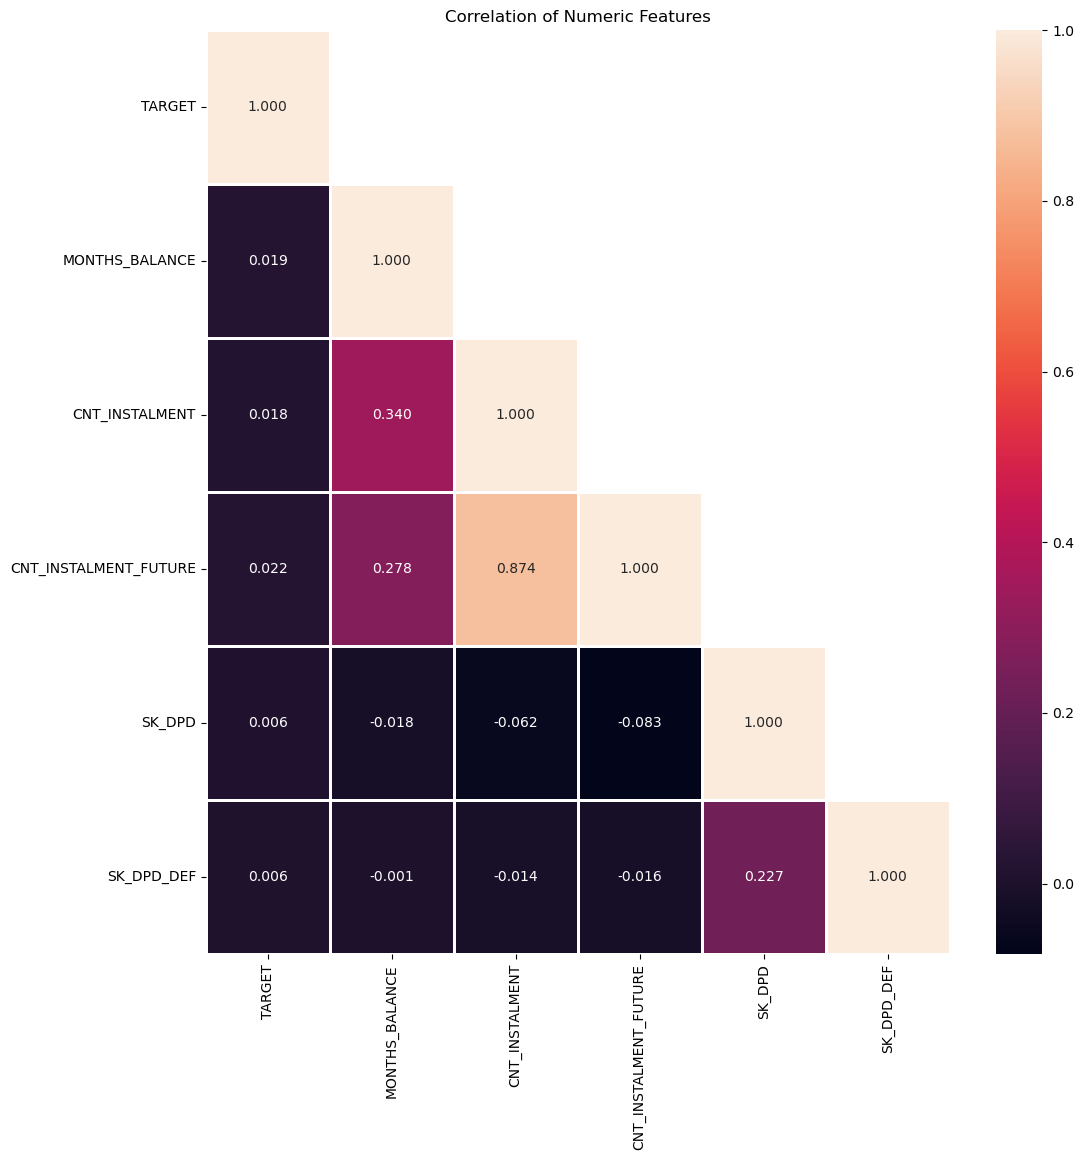

In [53]:
mask = np.zeros_like(numeric_corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

plt.figure(figsize=(12, 12))
sns.heatmap(numeric_corr_df, mask=mask, annot=True, fmt=".3f", linewidth=1.0)
plt.title('Correlation of Numeric Features')

In [57]:
top_corr_target_df = numeric_corr_df.iloc[1:,0].sort_values(ascending = False)

print("-" * 100)
print("Columns with highest values of correlation with Target Variable are:")
top_corr_target_df

----------------------------------------------------------------------------------------------------
Columns with highest values of correlation with Target Variable are:


CNT_INSTALMENT_FUTURE    0.021500
MONTHS_BALANCE           0.019416
CNT_INSTALMENT           0.017968
SK_DPD                   0.006454
SK_DPD_DEF               0.005827
Name: TARGET, dtype: float64

- Feature CNT_INSTALLMENT và CNT_INSTALLMENT_FUTURE có độ tương quan khá cao (0.872) --> chỉ nên đem một feature vào model

- Mối tương quan của các features với Target là rất thấp, điều này cho thấy không có mối quan hệ tuyến tính giữa các features và Target.

### Plotting Continuous Variables

Firstly we will group by the 'SK_ID_PREV' field and aggregate with mean, so that we get an averaged row for each of the previous loan that the client had.

In [58]:
pos_cash_merged = pos_cash_merged.groupby('SK_ID_PREV').mean()
pos_cash_merged

,SK_ID_CURR,TARGET,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,
1000001.0,117953.0,0.0,-9.0,8.666667,7.666667,0.0,0.0
1000003.0,6707.0,0.0,-2.5,12.000000,10.500000,0.0,0.0
1000005.0,83759.0,0.0,-51.0,10.000000,5.000000,0.0,0.0
1000008.0,185554.0,0.0,-38.5,9.900000,5.400000,0.0,0.0
1000011.0,268838.0,0.0,-9.0,12.000000,6.000000,0.0,0.0
...,...,...,...,...,...,...,...
2843494.0,70155.0,0.0,-25.0,32.666667,31.666667,0.0,0.0
2843495.0,274857.0,1.0,-12.5,53.375000,49.875000,0.0,0.0
2843497.0,50590.0,0.0,-11.0,24.000000,14.000000,0.0,0.0


**Distribution of Continous Variable**

In [73]:
from utils.eda import explore_data as explore

**MONTH_BALANCE vs Target**

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MONTHS_BALANCE', ylabel='Density'>

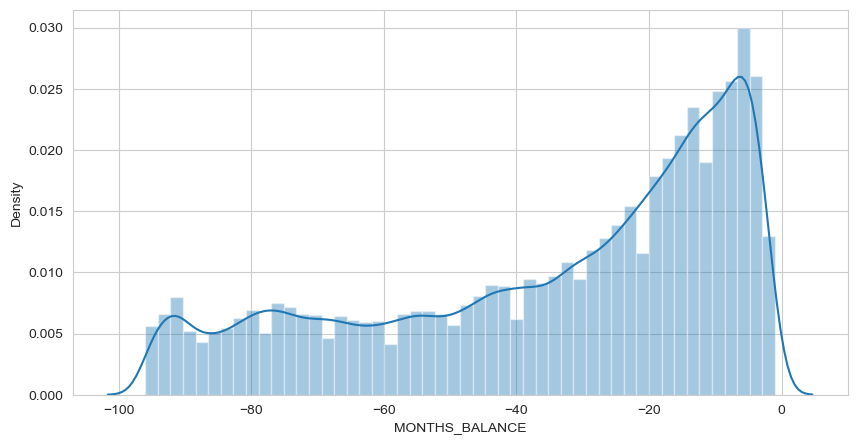

In [76]:
plt.figure(figsize=(10, 5))
sns.distplot(pos_cash_merged.MONTHS_BALANCE)

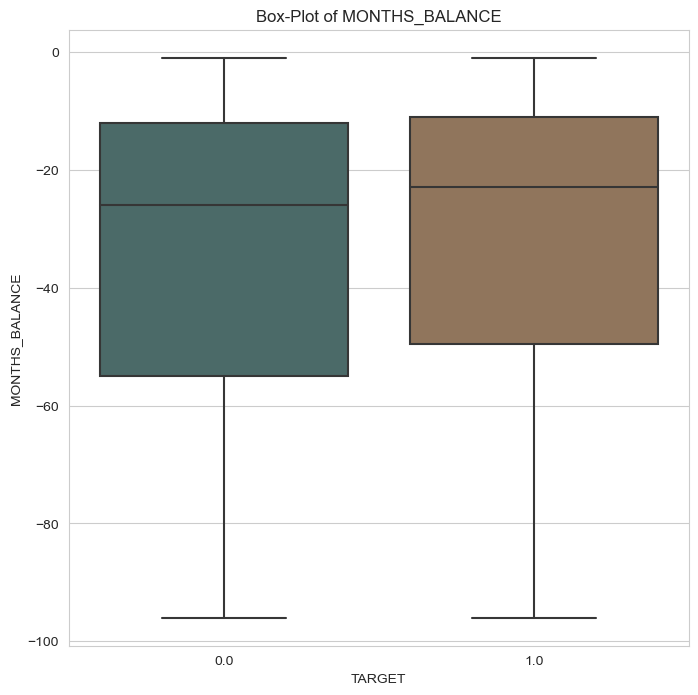

In [78]:
explore.plot_continuous_variables(
    pos_cash_merged, 'MONTHS_BALANCE', plots=['box'], figsize=(8, 8))

**CNT_INSTALMENT_FUTURE vs TARGET**

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CNT_INSTALMENT_FUTURE', ylabel='Density'>

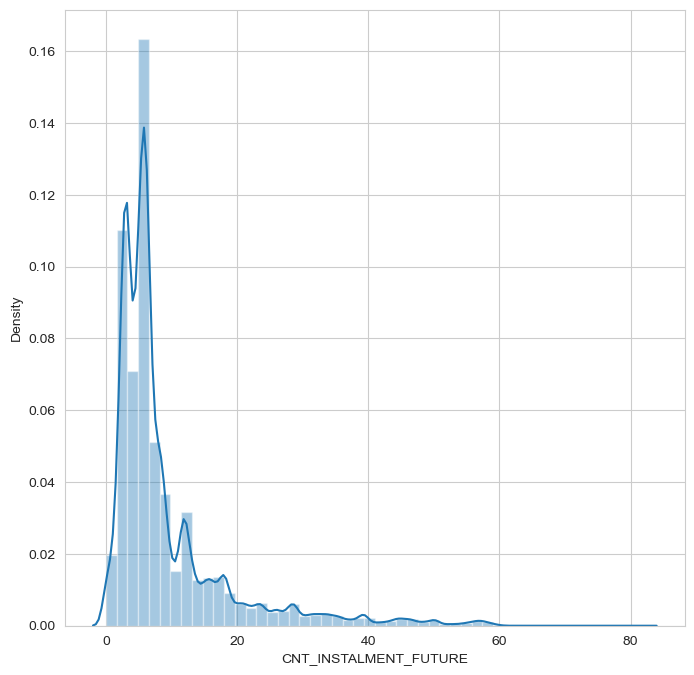

In [72]:
plt.figure(figsize=(8,8))
sns.distplot(pos_cash_merged.CNT_INSTALMENT_FUTURE)

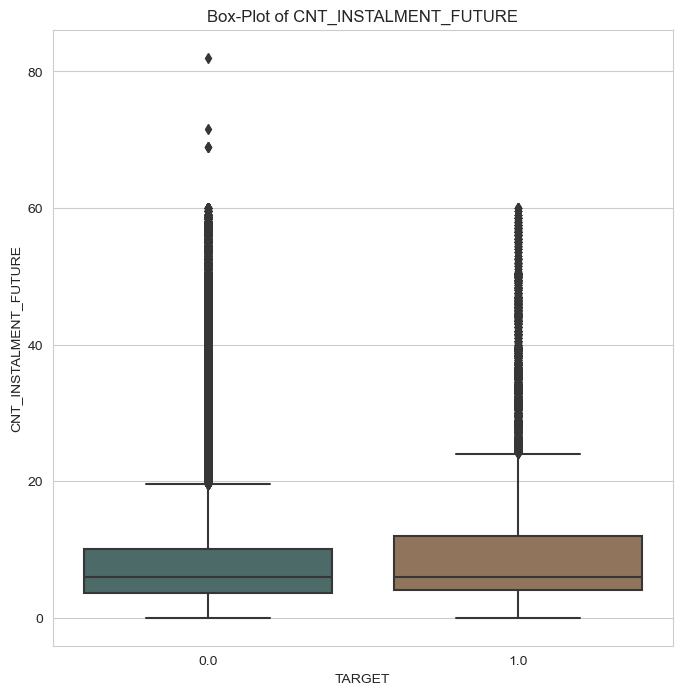

In [60]:
explore.plot_continuous_variables(pos_cash_merged, 'CNT_INSTALMENT_FUTURE', plots = ['box'], figsize = (8, 8))

##### Observations and Conclusions

Ta thấy rằng các giá trị percentile> 50% cho Người thanh toán chậm(target = 1 ) thường cao hơn so với Người thanh toán đúng hạn(target = 0). Ngay cả upper limit whisker của Người thanh toán chậm cũng cao hơn so với Người thanh toán đúng hạn. Điều này cho thấy rằng Người thanh toán chậm có xu hướng có số tiền thanh toán còn lại trên khoản vay trước của họ cao hơn so với Người thanh toán đúng hạn.